# Churn Modelling using ANN.

Importing the libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Part 1 - Data Preprocessing

Importing dataset.

In [4]:
dataset = pd.read_csv(r'D:\Churn-Modelling.csv')

In [6]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Getting information about the dataset.

In [27]:
dataset.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
No null values are present.

In [7]:
dataset.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
8039       8040    15773520       Begg          672    France  Female   43   
8040       8041    15627439  Pickering          624     Spain  Female   36   
8041       8042    15701439    Fanucci          698     Spain  Female   50   
8042       8043    15785352      Chang          606    France    Male   37   
8043       8044    15616525  Sopuluchi          720     Spain    Male   31   

      Tenure    Balance  NumO

The dataset contains 8044 rows and 14 features of which the last one Exited is aur dependent feature rest are independent.
Also, the first three freatures (RowNumber,CustomerId and Surname) are not so much of important. They are just the unique values and won't play a very much factor so we will not use them. 

In [8]:
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [9]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [10]:
y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In our dataset both Geography and Gender feature are categorical. So, we need to convert this into dummy variables.

In [17]:
Geography = pd.get_dummies(X['Geography'],drop_first=True)
Gender = pd.get_dummies(X['Gender'],drop_first=True)

Concatenate the Data Frame.

In [22]:
X = pd.concat([X,Geography,Gender],axis=1)

Dropping unnecessary columns. 

In [24]:
X = X.drop(['Geography','Gender'],axis=1)

In [28]:
X.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


Splitting dataset into training and test set.

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)

Now, we will perform the Feature Scaling.

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [32]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [34]:
X_train

array([[ 1.03655627, -1.62593759, -0.00769078, ..., -0.57429976,
        -0.57884561,  0.91947043],
       [-0.04951222, -0.8561108 , -1.39203066, ..., -0.57429976,
        -0.57884561,  0.91947043],
       [-0.26672591,  0.58731444, -0.69986072, ..., -0.57429976,
        -0.57884561, -1.08758256],
       ...,
       [-1.54932108,  1.64582627, -1.39203066, ..., -0.57429976,
        -0.57884561,  0.91947043],
       [ 1.69854087, -0.75988245, -1.39203066, ..., -0.57429976,
        -0.57884561,  0.91947043],
       [-0.27706942,  0.87599948, -1.39203066, ...,  1.74125095,
        -0.57884561, -1.08758256]])

In [35]:
X_test

array([[-0.30809995,  0.49108609,  1.03056414, ..., -0.57429976,
         1.72757637,  0.91947043],
       [ 0.66418993, -1.33725254, -0.35377575, ..., -0.57429976,
        -0.57884561, -1.08758256],
       [ 1.43995314, -0.75988245, -0.35377575, ..., -0.57429976,
        -0.57884561,  0.91947043],
       ...,
       [ 0.11598393, -1.04856749,  0.68447917, ..., -0.57429976,
         1.72757637, -1.08758256],
       [ 0.69522046,  0.97222783, -1.39203066, ..., -0.57429976,
         1.72757637, -1.08758256],
       [-0.49428312, -0.95233914, -0.00769078, ..., -0.57429976,
         1.72757637,  0.91947043]])

Part 2 - Building our ANN model.

Importing Keras libraries and packages.

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import PReLU,LeakyReLU,ELU
from keras.layers import Dropout

Initialising ANN.

In [37]:
classifier = Sequential()

Adding the input layer and first hidden layer.

In [38]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim = 11))

Adding the second hidden layer.

In [39]:
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

Adding the output layer.

In [40]:
classifier.add(Dense(units=1,kernel_initializer = 'glorot_uniform',activation='sigmoid'))

Compiling the ANN.

In [41]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Fitting the model to the training dataset.

In [42]:
model_history = classifier.fit(X_train,y_train, validation_split=0.33, batch_size=10,epochs=100)

Train on 4311 samples, validate on 2124 samples
Epoch 1/100
4311/4311 [==============================] - 2s 487us/step - loss: 0.5406 - accuracy: 0.7908 - val_loss: 0.5102 - val_accuracy: 0.7905
Epoch 2/100
4311/4311 [==============================] - 1s 188us/step - loss: 0.4855 - accuracy: 0.7908 - val_loss: 0.4779 - val_accuracy: 0.7905
Epoch 3/100
4311/4311 [==============================] - 1s 218us/step - loss: 0.4587 - accuracy: 0.7915 - val_loss: 0.4598 - val_accuracy: 0.7910
Epoch 4/100
4311/4311 [==============================] - 1s 203us/step - loss: 0.4409 - accuracy: 0.7956 - val_loss: 0.4455 - val_accuracy: 0.7994
Epoch 5/100
4311/4311 [==============================] - 1s 211us/step - loss: 0.4287 - accuracy: 0.8072 - val_loss: 0.4365 - val_accuracy: 0.8098
Epoch 6/100
4311/4311 [==============================] - 1s 209us/step - loss: 0.4201 - accuracy: 0.8154 - val_loss: 0.4274 - val_accuracy: 0.8211
Epoch 7/100
4311/4311 [==============================] - 1s 195us/step

In [44]:
print(model_history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


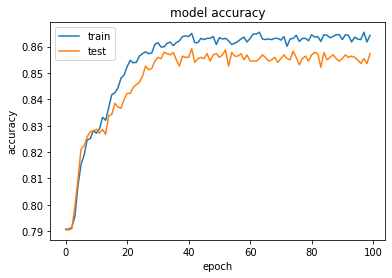

In [47]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

History of Loss.

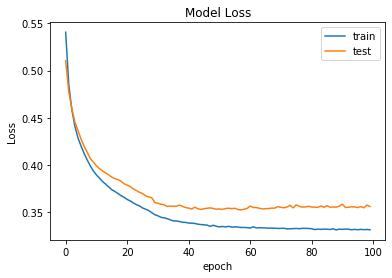

In [51]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.legend(['train','test'], loc='upper right')

Part 3 - Making predictions and evalating the model.

In [52]:
y_pred = classifier.predict(X_test)

In [54]:
y_pred = (y_pred > 0.5)

Building confusion matrix.

In [57]:
from sklearn.metrics import confusion_matrix

In [58]:
cm = confusion_matrix(y_pred, y_test)

In [59]:
cm

array([[1227,  161],
       [  73,  148]], dtype=int64)

Calulating the accuracy.

In [60]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [61]:
score

0.8545680546923555